<a href="https://colab.research.google.com/github/levivanni/MachineLearningNotes/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

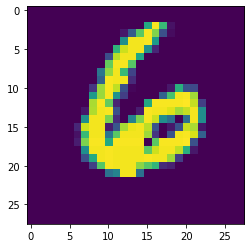

In [4]:
plt.imshow(train_images[299])

In [5]:
train_labels[299]

6

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_images = train_images.astype('float') / 255.0
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.astype('float') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1417 - accuracy: 0.9582 - val_loss: 0.0582 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0473 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0438 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0422 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0463 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0590 -